### Script for reading data for Problem 5.2 (data_BohrHypothesis.txt) in Applied Statistics 2021 exam:

This script reads the file __"data_BohrHypothesis.txt"__ for Problem 5.2 in the exam of Applied Statistics 2021/22. This data files contains 216545 entries in two columns: 

* **wavelength** (nm) of radiation,
* **voltage** (V) of power supply.

The script was distributed along with the exam and the data file itself on the 20th of January 2022.

####  Author: 
- Troels Petersen (Niels Bohr Institute, petersen@nbi.dk)

####  Date:   
 - 19th of January 2022 (first version)

In [2]:
import scipy
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories
from scipy import stats
from scipy.stats import binom, poisson, norm           # Functions from SciPy Stats...
# import scipy.optimize as optimization
from scipy import optimize
from numpy.linalg import inv
from functools import partial
from fitter import Fitter
from astropy.modeling import models, fitting
from scipy.optimize import leastsq
import math

In [3]:
import pandas as pd

In [4]:
sys.path.append('D:\my github\Siyi Applied Stats\Documents for JN\AppStat2021-main\External_Functions\\')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

plt.rcParams['font.size'] = 18     # Set some basic plotting parameters

In [5]:
dataframe = pd.read_csv('data_BohrHypothesis.csv', header=0, index_col=None)
wavel, voltage = dataframe.values.T
dataframe

,wavelength(nm),voltage(V)
0,2439.703,134.833
1,1276.206,102.063
2,1665.593,98.818
3,1868.467,123.123
4,2075.338,103.849
...,...,...
216540,1761.204,137.935
216541,1748.524,153.508
216542,1555.461,76.994
216543,1367.070,87.436


Print the first 10 entries to check the content of the file:

In [6]:
for i in range(10):
    print(f"  wavelength = {wavel[i]:4.2f} nm    voltage = {voltage[i]:6.2f} V")

  wavelength = 2439.70 nm    voltage = 134.83 V
  wavelength = 1276.21 nm    voltage = 102.06 V
  wavelength = 1665.59 nm    voltage =  98.82 V
  wavelength = 1868.47 nm    voltage = 123.12 V
  wavelength = 2075.34 nm    voltage = 103.85 V
  wavelength = 1962.51 nm    voltage =  96.54 V
  wavelength = 1563.69 nm    voltage =  91.83 V
  wavelength = 1395.86 nm    voltage = 107.95 V
  wavelength = 2112.96 nm    voltage =  74.54 V
  wavelength = 1434.76 nm    voltage = 129.24 V


In [7]:
print(np.min(wavel),np.max(wavel))

1193.615 5903.585


In [8]:
Nbins = 500
x_all=wavel
xmin,xmax=1400,2200
binwidth = (xmax-xmin)/Nbins  #binwidth = (xmax-xmin)/Nbins
print(binwidth)

condition = (wavel<xmax)*(wavel>xmin)
x_all = wavel[condition]  # x_2是本图xmin, xmax = 2.5, 3.5范围内voltage点,x是将x_2 binned后的
print(np.size(x_all))
print(type(x_all))


counts, bin_edges = np.histogram(x_all, bins=Nbins, range=(xmin, xmax))
x = (bin_edges[1:][counts>0] + bin_edges[:-1][counts>0])/2
y = counts[counts>0]
sy = np.sqrt(counts[counts>0])   # NOTE: We (naturally) assume that the bin count is Poisson distributed.
                       # This is an approximation, since there is a low count in the last bins.

# print(np.where(y==177))
print(np.size(x),np.size(y),np.size(sy))

1.6
145195
<class 'numpy.ndarray'>
500 500 500


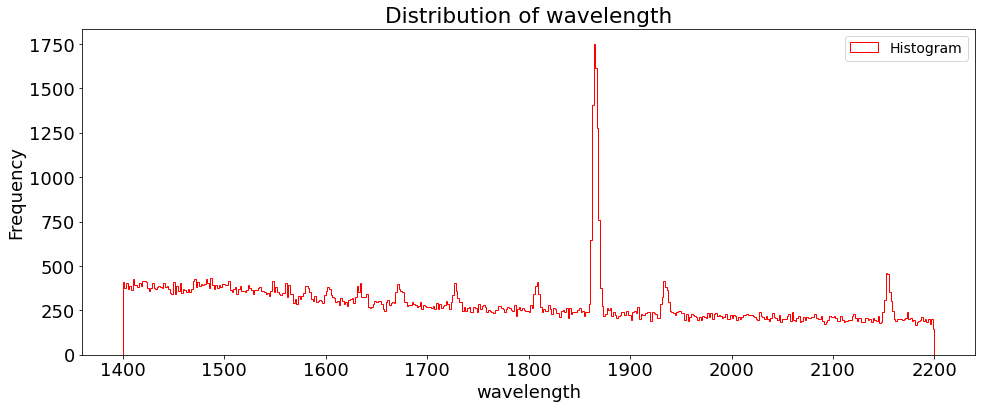

In [9]:
# Create just a single figure and axes, and a (classic) histogram:
fig, ax = plt.subplots(figsize=(16, 6))  # figsize is in inches
#ax.set_yscale('log',nonposy='mask',subsy=[0]) # y-axis log
hist = ax.hist(x_all, bins=Nbins, range=(xmin, xmax), histtype='step', linewidth=1,color='red', label='Histogram')
#ax.errorbar(x, y, yerr=sy, xerr=0.0, label='Data, with Poisson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

# Set the figure texts; xlabel, ylabel and title.
ax.set(xlabel="wavelength",           # the label of the y axis
       ylabel="Frequency",           # the label of the y axis
       title="Distribution of wavelength")    # the title of the plot
ax.legend(loc='upper right', fontsize=14);       # could also be # loc = 'upper right' e.g.


fig.savefig('fig5',dpi=600)

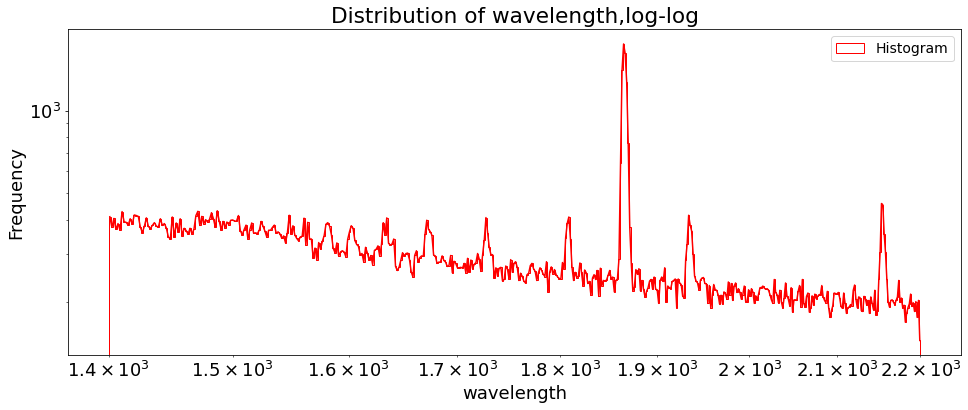

In [10]:
# Create just a single figure and axes, and a (classic) histogram:
fig, ax = plt.subplots(figsize=(16, 6))  # figsize is in inches
#ax.set_yscale('log',nonposy='mask',subsy=[0]) # y-axis log
plt.loglog(x,y,'r') # x、y-axis log
hist = ax.hist(x_all, bins=Nbins, range=(xmin, xmax), histtype='step', linewidth=1,color='red', label='Histogram')
#ax.errorbar(x, y, yerr=sy, xerr=0.0, label='Data, with Poisson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

# Set the figure texts; xlabel, ylabel and title.
ax.set(xlabel="wavelength",           # the label of the y axis
       ylabel="Frequency",           # the label of the y axis
       title="Distribution of wavelength,log-log")    # the title of the plot
ax.legend(loc='upper right', fontsize=14);       # could also be # loc = 'upper right' e.g.


fig.savefig('fig6',dpi=600)

In [11]:
n1=3

Lamda_3=10967700*(1/n1**2)
print(Lamda_3)

1218633.3333333333


MemoryError: In RendererAgg: Out of memory

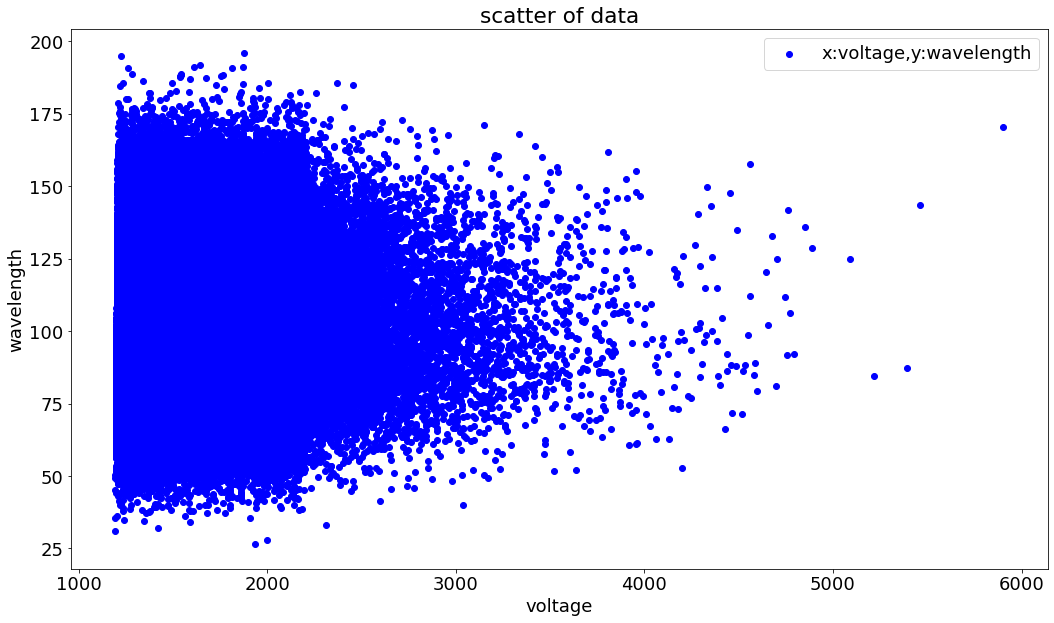

In [15]:

Nbins = 100
#xmin2,xmax2=0,1.2
#binWidth= (xmax2-xmin2)/Nbins
fig2, ax2 = plt.subplots(figsize=(15, 9))
#ax2.hist(intensity, bins=Nbins, range=(xmin2, xmax2), histtype='step', label='Histogram (size)' )
ax2.scatter(wavel,voltage,c='blue', label='x:voltage,y:wavelength',linewidth=1)
ax2.set(xlabel="voltage", ylabel="wavelength")


# Add legend
ax2.legend(loc='upper right')

plt.title('scatter of data')
fig2.tight_layout()

fig2.savefig("fig8.png", dpi=600)
